# Project 1: Healthcare_Heart Disease Prediction

**Background**: Heart disease one of diseases that leads to death. 
Understanding the influence of various factors on the heart disease could help to detect the disease earlier which could improve patient outcomes. 

**Project Objective**: Develop a machine learning model that can effectively predict the presence or absence of heart disease based on various medical and lifestyle factors. 

**Dataset** from ParkwayPantai

**Expected results**:  feature engineering, visualization, test and check model accuracy. Try different models and techniques to improve the accuracy. Interpret results.

**Reporting**: Do ppt explaining full process of your analysis

# Import libraries

In [1]:
#General libraries
import numpy as np
import pandas as pd

#libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries for data preparation and results presentation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix , classification_report, precision_score, recall_score, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Load Data

In [2]:
df = pd.read_csv ('C:\\Users\\Precious\\OneDrive\\Documents\\Internship project\\Projects\\Project 3 - Healthcare - Predictive Analytics\\Dataset\\cardio_data.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


comment: **Target variable**> disease

# Data Preparation

In [3]:
df.shape

(70000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [5]:
df.isna().any().any()

False

In [6]:
df.columns

Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease'],
      dtype='object')

In [7]:
df_drop = df.drop(['date','id'], axis = 1)
df_drop.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [8]:
# Feature Engineering
# Create new features if necessary (e.g., BMI = weight / (height/100)^2)
df_drop['bmi'] = df_drop['weight']/(df_drop['height']/100)**2
df_drop.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,bmi
0,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,21.967120
1,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,34.927679
2,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,23.507805
3,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,28.710479
4,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,23.011177


In [9]:
df_drop['gender_full'] = df_drop['gender'].replace([1.0, 2.0], ['male','Female'])
df_drop.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,bmi,gender_full
0,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,21.967120,Female
1,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,34.927679,male
2,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,23.507805,male
3,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,28.710479,Female
4,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,23.011177,male


In [10]:
df_drop = df_drop.drop(['gender'], axis = 1)
df_drop.head(2)

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gluc,height,occupation,smoke,weight,disease,bmi,gender_full
0,Indonesia,1,18393,0,110,80,1,1,168,Architect,0,62.0,0,21.967120,Female
1,Malaysia,1,20228,0,140,90,3,1,156,Accountant,0,85.0,1,34.927679,male


In [11]:
#categorial features with unique values <= 10
categorical_features = [col for col in df_drop.columns if df_drop[col].nunique() <= 10]
print (categorical_features)

['country', 'active', 'alco', 'cholesterol', 'gluc', 'occupation', 'smoke', 'disease', 'gender_full']


# Data Analysis

Text(0.5, 0.98, 'Disease Distribution')

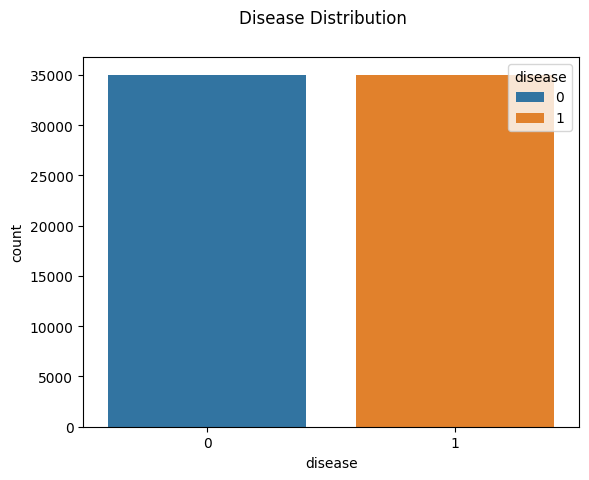

In [12]:
# count number of patients with heart disease 

sns.countplot(x=df_drop.disease, hue = df_drop.disease) # hue is for colour
plt.suptitle ("Disease Distribution")

comment: The target variable is evenly distributed

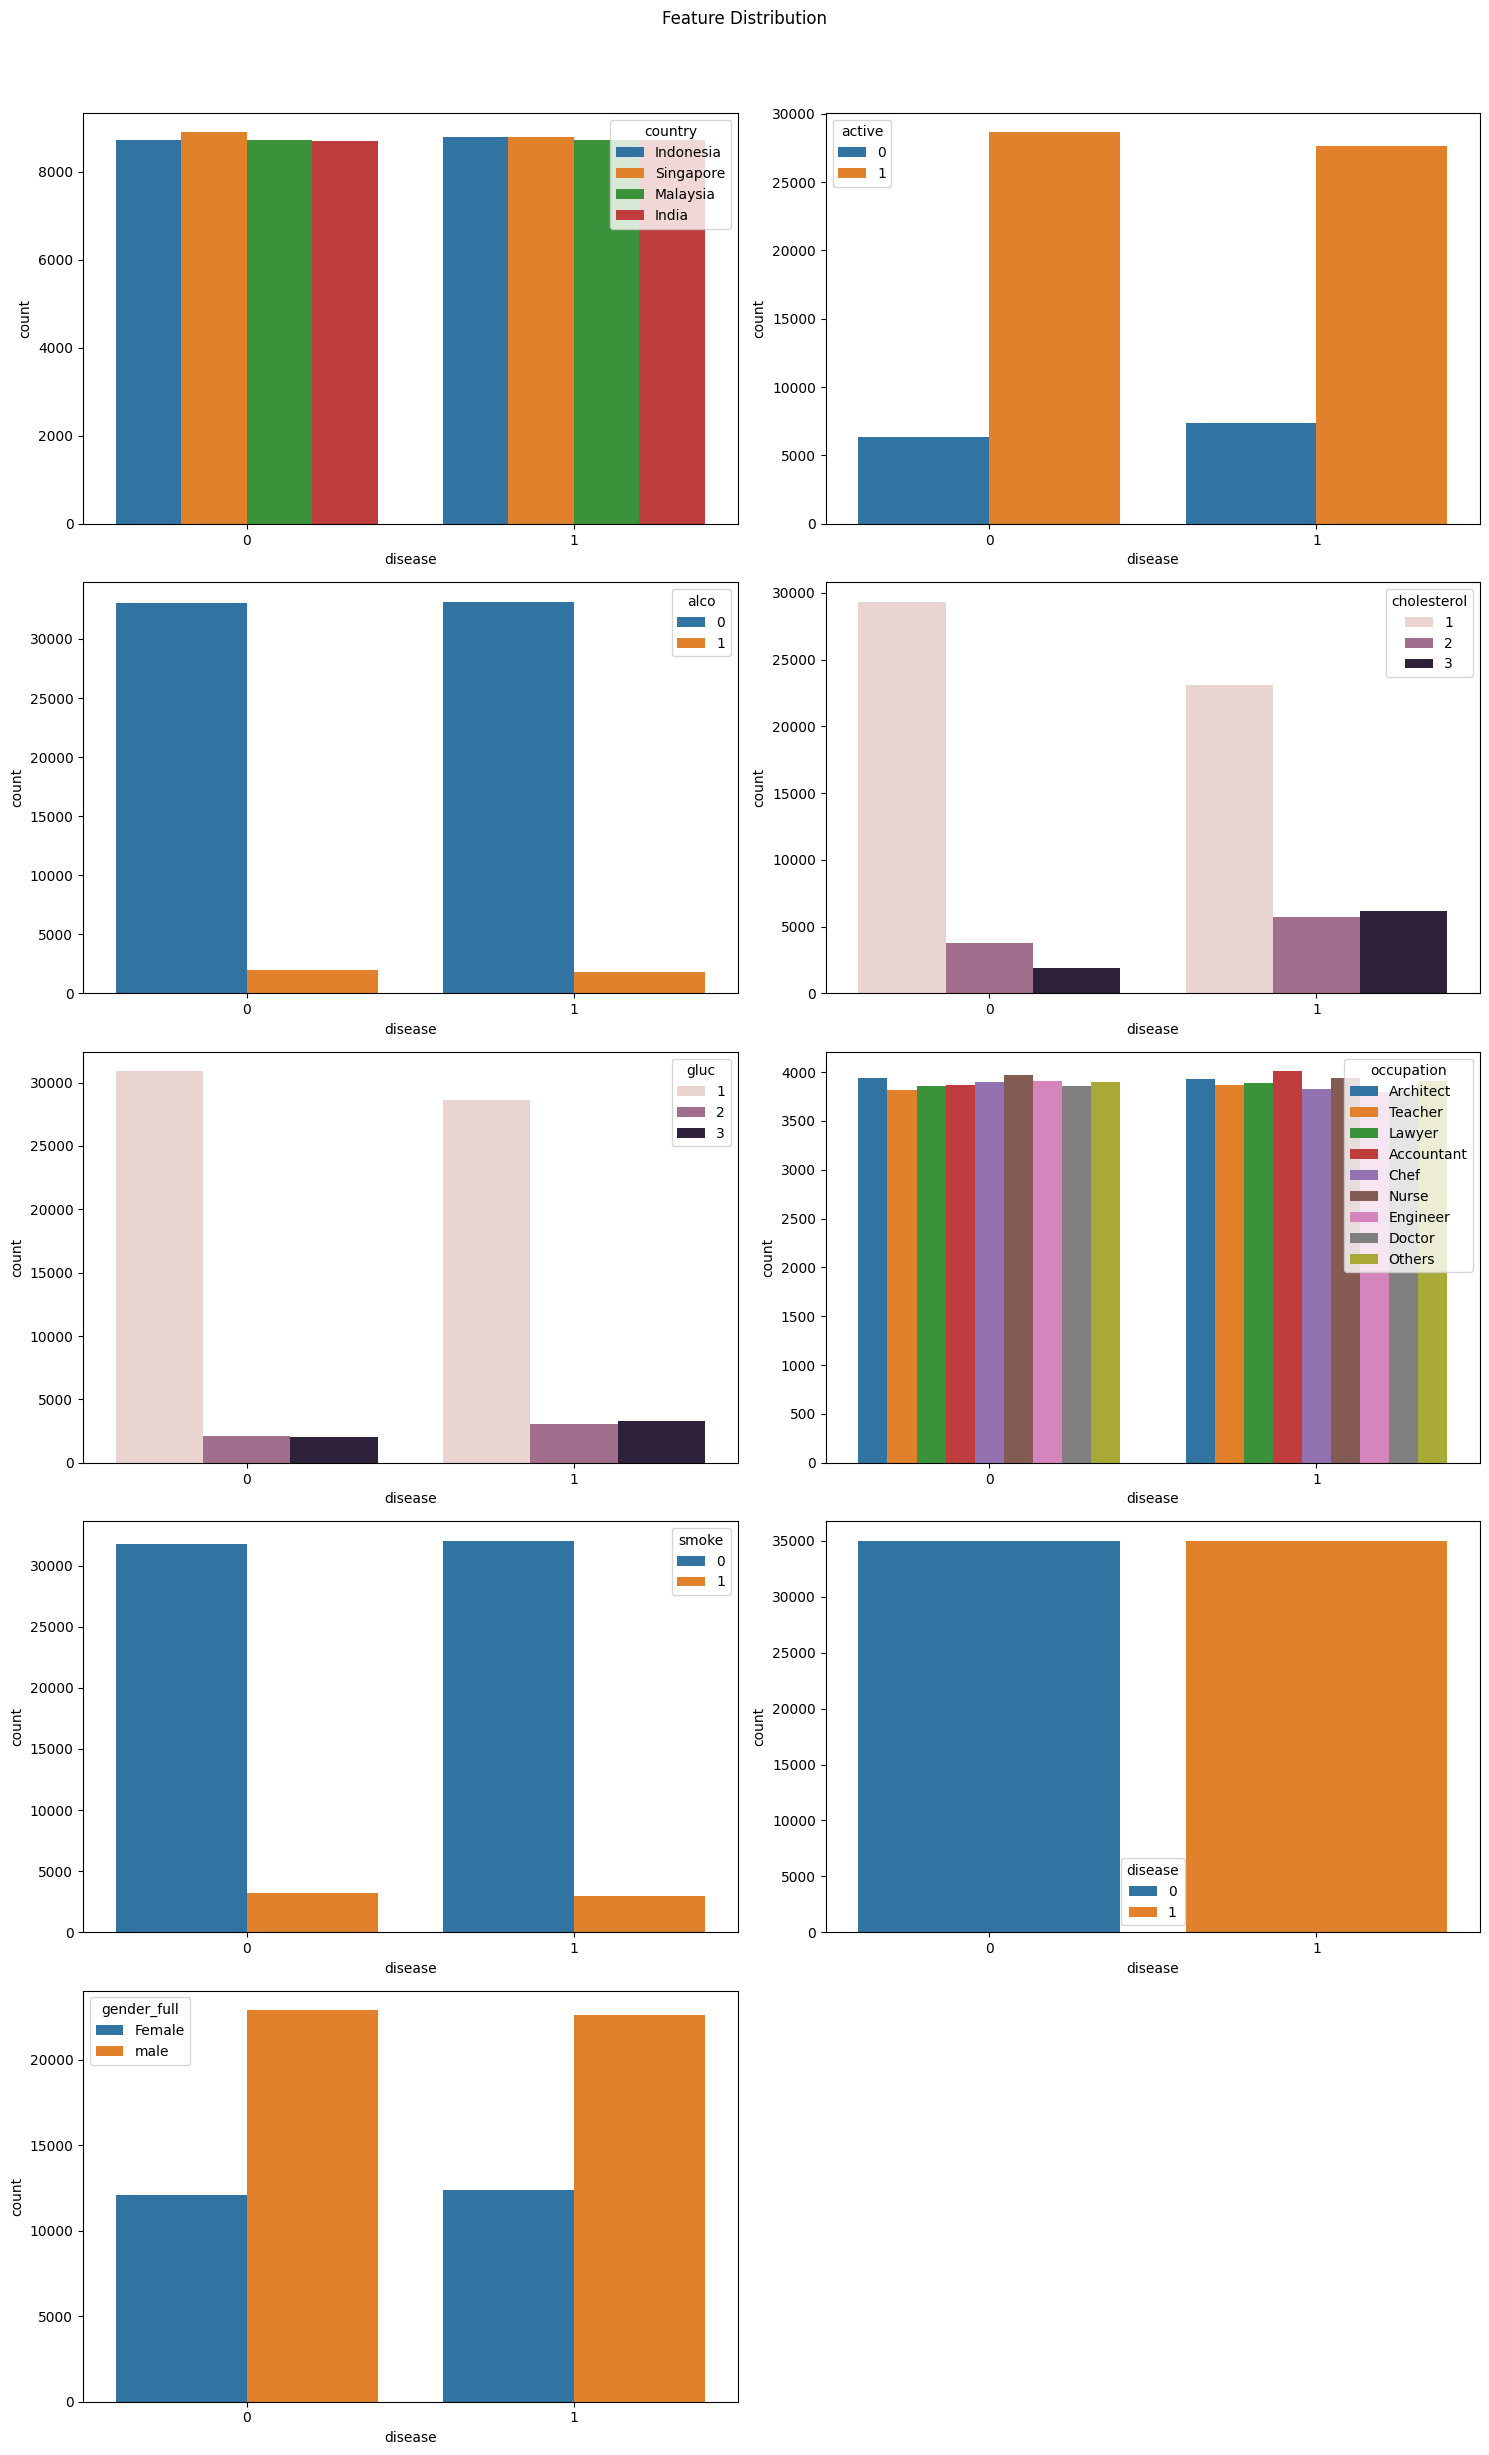

In [13]:
#Overview of features and their relations with disease
#Note> made an error on this cell while reviewing the work, could not use df_drop for plots in this cell.

fig, ax = plt.subplots (5, 2, figsize = (15,25))
for axi, var in zip(ax.flat,categorical_features):
    sns.countplot(x=df_drop.disease, hue = df_drop[var], ax = axi) # hue is for colour
   
# Hide unused axes 
total_plots = len(categorical_features)
ax = ax.flatten()
for j in range(len(categorical_features), len(ax)):
    ax[j].set_visible(False)
    
#plot
plt.suptitle ("Feature Distribution")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Comment:

The countries are slightly evenly distributed in terms if disease status. Location seem not to have an influence in heart disease.

There are more active people than non-active ones. However, the active ones they are more slightly prone to heartdisease.

More non-alcohol cosumers who are are evenly distributed for heart disease status.

More people with cholestrol 1 and gluc 1, and they show to be even in both with or without heart disease

Occupation does not have much influence in heart disease, however, it seem slike accountants are more prone to heart disease

More non-smokers, show to be slighlty mached for heart disease status. 

There are more males than females, the males are more prone to heart disease as compared to women. 


In [14]:
numerical_features = [col for col in df_drop.columns if df_drop[col].nunique() >= 10]
print (numerical_features)

['age', 'ap_hi', 'ap_lo', 'height', 'weight', 'bmi']


In [15]:
#correlation of features
df_drop[numerical_features].corr()

,age,ap_hi,ap_lo,height,weight,bmi
age,1.000000,0.020764,0.017647,-0.081515,0.053684,0.085512
ap_hi,0.020764,1.000000,0.016086,0.005488,0.030702,0.024852
ap_lo,0.017647,0.016086,1.000000,0.006150,0.043710,0.035345
height,-0.081515,0.005488,0.006150,1.000000,0.290968,-0.290642
weight,0.053684,0.030702,0.043710,0.290968,1.000000,0.762009
bmi,0.085512,0.024852,0.035345,-0.290642,0.762009,1.000000


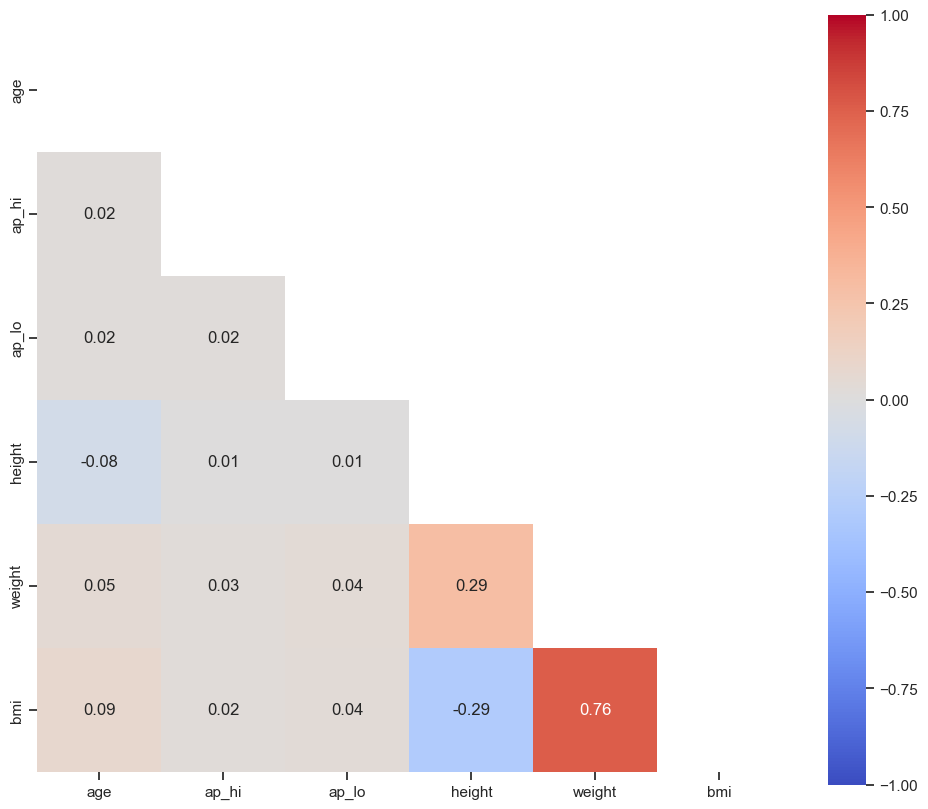

In [16]:
#plot correlations using heatmap

# correlation matrix heatmap visualization
sns.set(style="ticks")

# Generate a mask for the upper triangle
matrix = np.triu(df_drop[numerical_features].corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(12,10))

# Plot the heatmap
_ = sns.heatmap(df_drop[numerical_features].corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True,
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

Comment:

Weight and bmi are highly correlated, could be because bmi is derived from weight

There is slight correlation of weight with height

Therefore, may need to drop weight column.

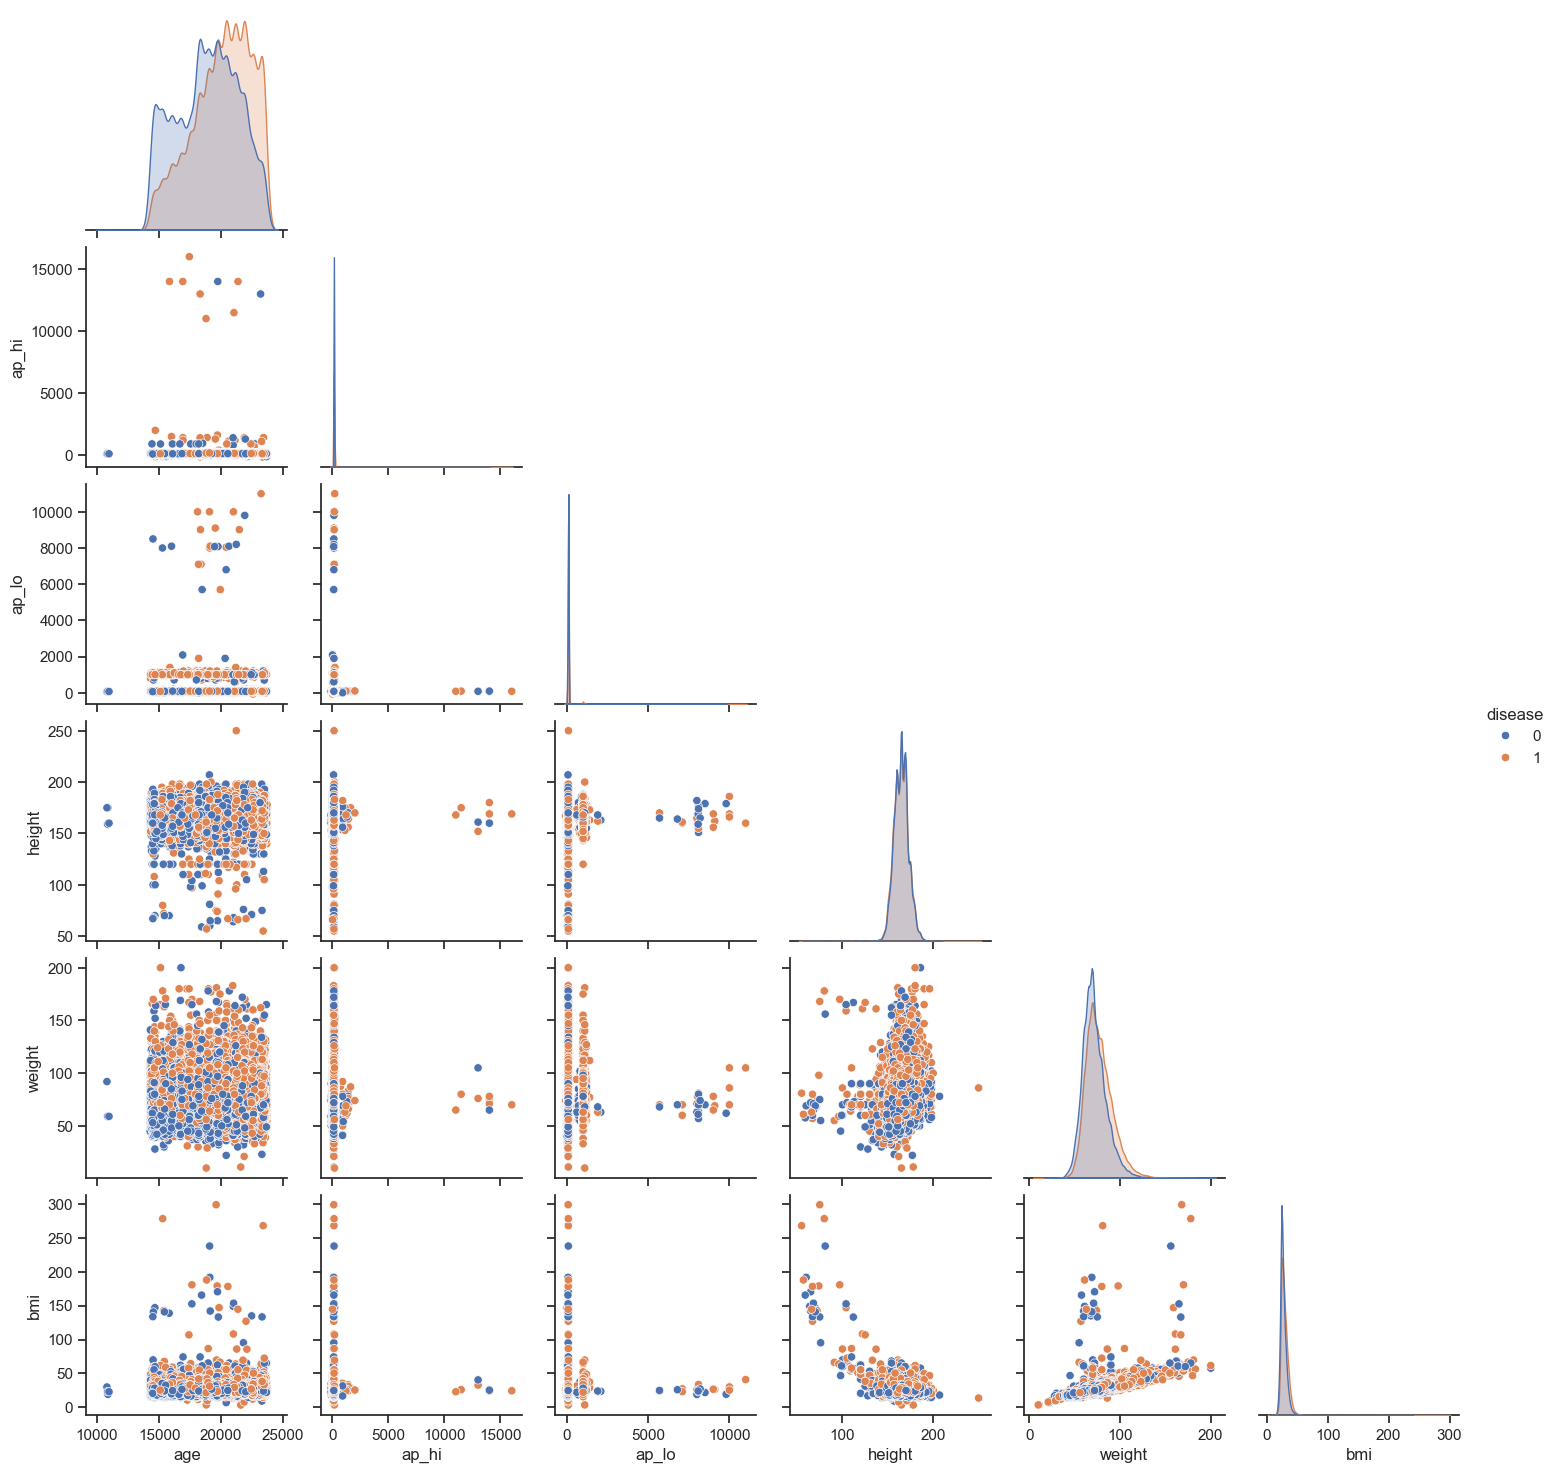

In [17]:
# Visualize correlations drilled down by dependent variable
_ = sns.pairplot(df_drop[numerical_features+['disease']], corner=True, hue='disease')

Comment:
The data for bmi, weight, height,ap_lo and ap_hi seem to be well distributed

There seem to be outliers on the data, esp. with ap_lo and ap_hi

Age is not well distributed. 

In [18]:
#from analysis few columns need to be dropped
df_drop = df_drop.drop(['occupation', 'country', 'weight'], axis = 1)
df_drop.head(2)

,active,age,alco,ap_hi,ap_lo,cholesterol,gluc,height,smoke,disease,bmi,gender_full
0,1,18393,0,110,80,1,1,168,0,0,21.967120,Female
1,1,20228,0,140,90,3,1,156,0,1,34.927679,male


# Data preparation for machine learning

In [19]:
print (categorical_features)

['country', 'active', 'alco', 'cholesterol', 'gluc', 'occupation', 'smoke', 'disease', 'gender_full']


In [20]:
#get dummies

columns = ['active', 'alco', 'cholesterol', 'gluc', 'smoke', 'gender_full']

df_drop = pd.get_dummies(df_drop, columns= columns, drop_first=False)
df_drop.sample()

,age,ap_hi,ap_lo,height,disease,bmi,active_0,active_1,alco_0,alco_1,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,gender_full_Female,gender_full_male
12725,21726,120,80,154,1,30.780907,False,True,True,False,False,False,True,False,False,True,True,False,False,True


In [21]:
#split data

x=df_drop.drop('disease',axis=1)
y=df_drop['disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, 
                                                    random_state = 42, stratify = y)

In [22]:
#scaled data

sc_train = StandardScaler()
sc_test = StandardScaler()

x_train_sc = sc_train.fit_transform(x_train)
x_test_sc = sc_test.fit_transform(x_test)

In [23]:
#metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels= ['No Heart Disease', 'Heart Disease'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Machine learning models

In [24]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(x_train_sc,y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10506
           1       0.75      0.67      0.71     10494

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



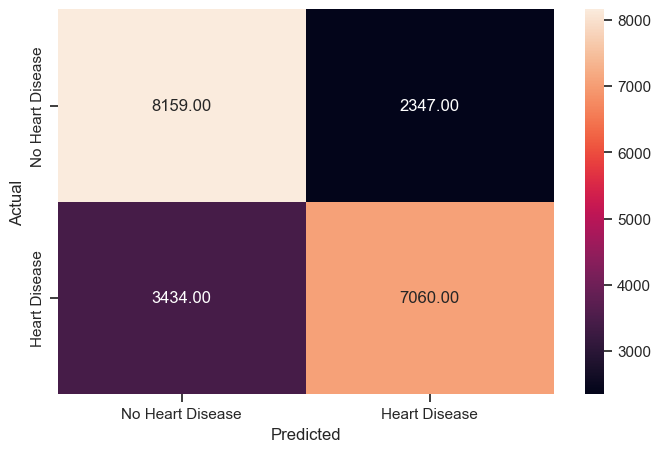

In [25]:
#Predicting for test set
y_pred_test = lg.predict(x_test_sc)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

In [26]:
# Printing the coefficients of logistic regression

cols = x_train.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
ap_hi,6.106058
age,0.386446
cholesterol_3,0.237025
bmi,0.225860
ap_lo,0.082155
height,0.070057
active_0,0.038570
gluc_2,0.031071
gluc_1,0.022977
alco_0,0.020387


In [27]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
ap_hi,448.566836
age,1.471741
cholesterol_3,1.267473
bmi,1.253400
ap_lo,1.085625
height,1.072569
active_0,1.039324
gluc_2,1.031559
gluc_1,1.023243
alco_0,1.020596


comment:

There are higher odds that ap_hi, age, cholestrol_3 and bmi could have higher influence on heart disease

The least featuers are cholestrol_1, gluc_3, active_1 and alco_1

In [28]:
#Decision tree model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.63      0.63      0.63     10506
           1       0.63      0.63      0.63     10494

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



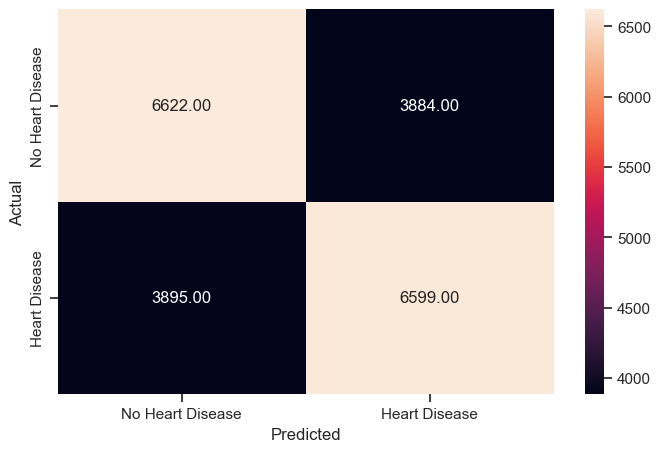

In [29]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

comment:

The accuracy for this model is 63%, which is low for recommended accuracy levels of >70% depending on application.

There is good response in terms of recall. The precision and f1_score need to be improved

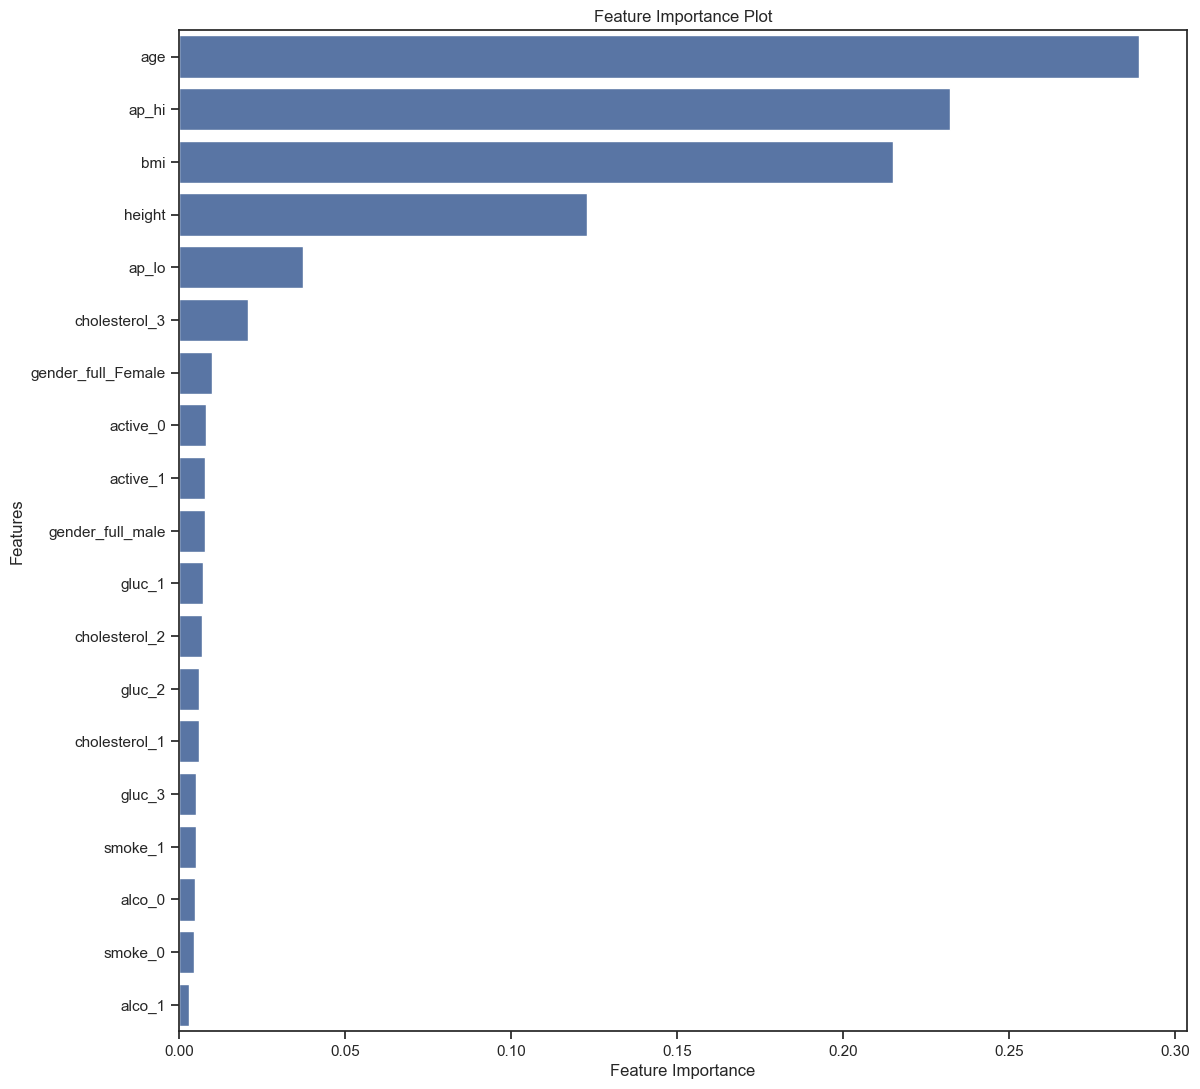

In [30]:

importances = dt.feature_importances_
columns = x.columns

# Create a DataFrame for feature importance
importance_df_drop = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


Comment:

Based on this model alco, smoke, gluc, cholestrol and gender have less influence on heart disease

In [31]:
#Hyperparamter tuning for decision tree model

parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

dt_clf = GridSearchCV(dt, parameters, scoring = 'f1_macro', cv = 5)

_ = dt_clf.fit(x_train, y_train)

print(f"Best estimator: {dt_clf.best_estimator_}")
print(f"Best parameters: {dt_clf.best_params_}")
print(f"Best score: {dt_clf.best_score_:.2f}")

Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}
Best score: 0.73


              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10506
           1       0.75      0.68      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



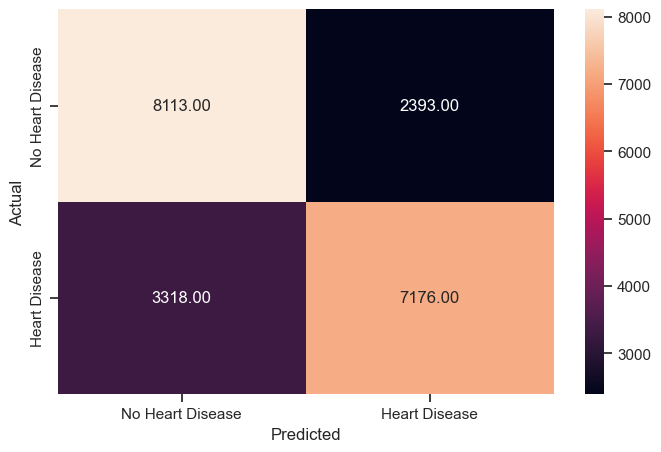

In [32]:
# Checking performace on test dataset
y_pred_test_dt_tuned = dt_clf.predict(x_test)

metrics_score(y_test, y_pred_test_dt_tuned)

comment: 

Tuning of the model improved the accuracy by 10% reaching 73%

The precisiom amd f1_score improved as well to values of 75% and 72%, respectively.

The recall score increased slightly from 63% to 68%

Thus, this tuned model shows good potential for predicting heart disease

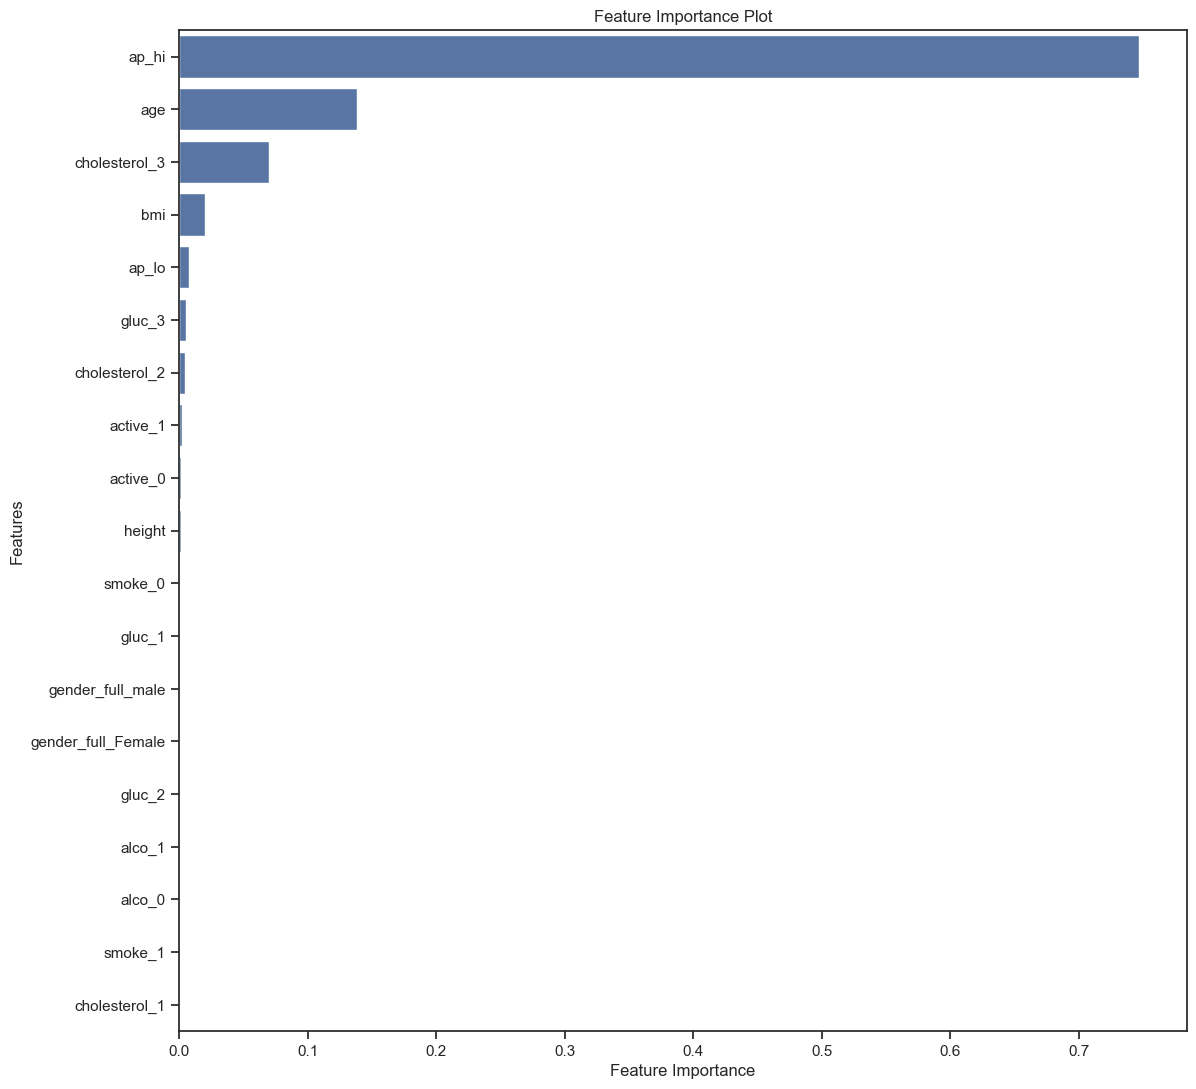

In [33]:
# feature importance using tuned model

best_model = dt_clf.best_estimator_

importances = best_model.feature_importances_
columns = x.columns

# Create a DataFrame for feature importance
importance_df_drop = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


Comment: 

The tuned model depicts that ap_hi, age, cholestrol_3 and bmi have higher influence on heart disease

Therefore, the least important features can be dropped from the dataset

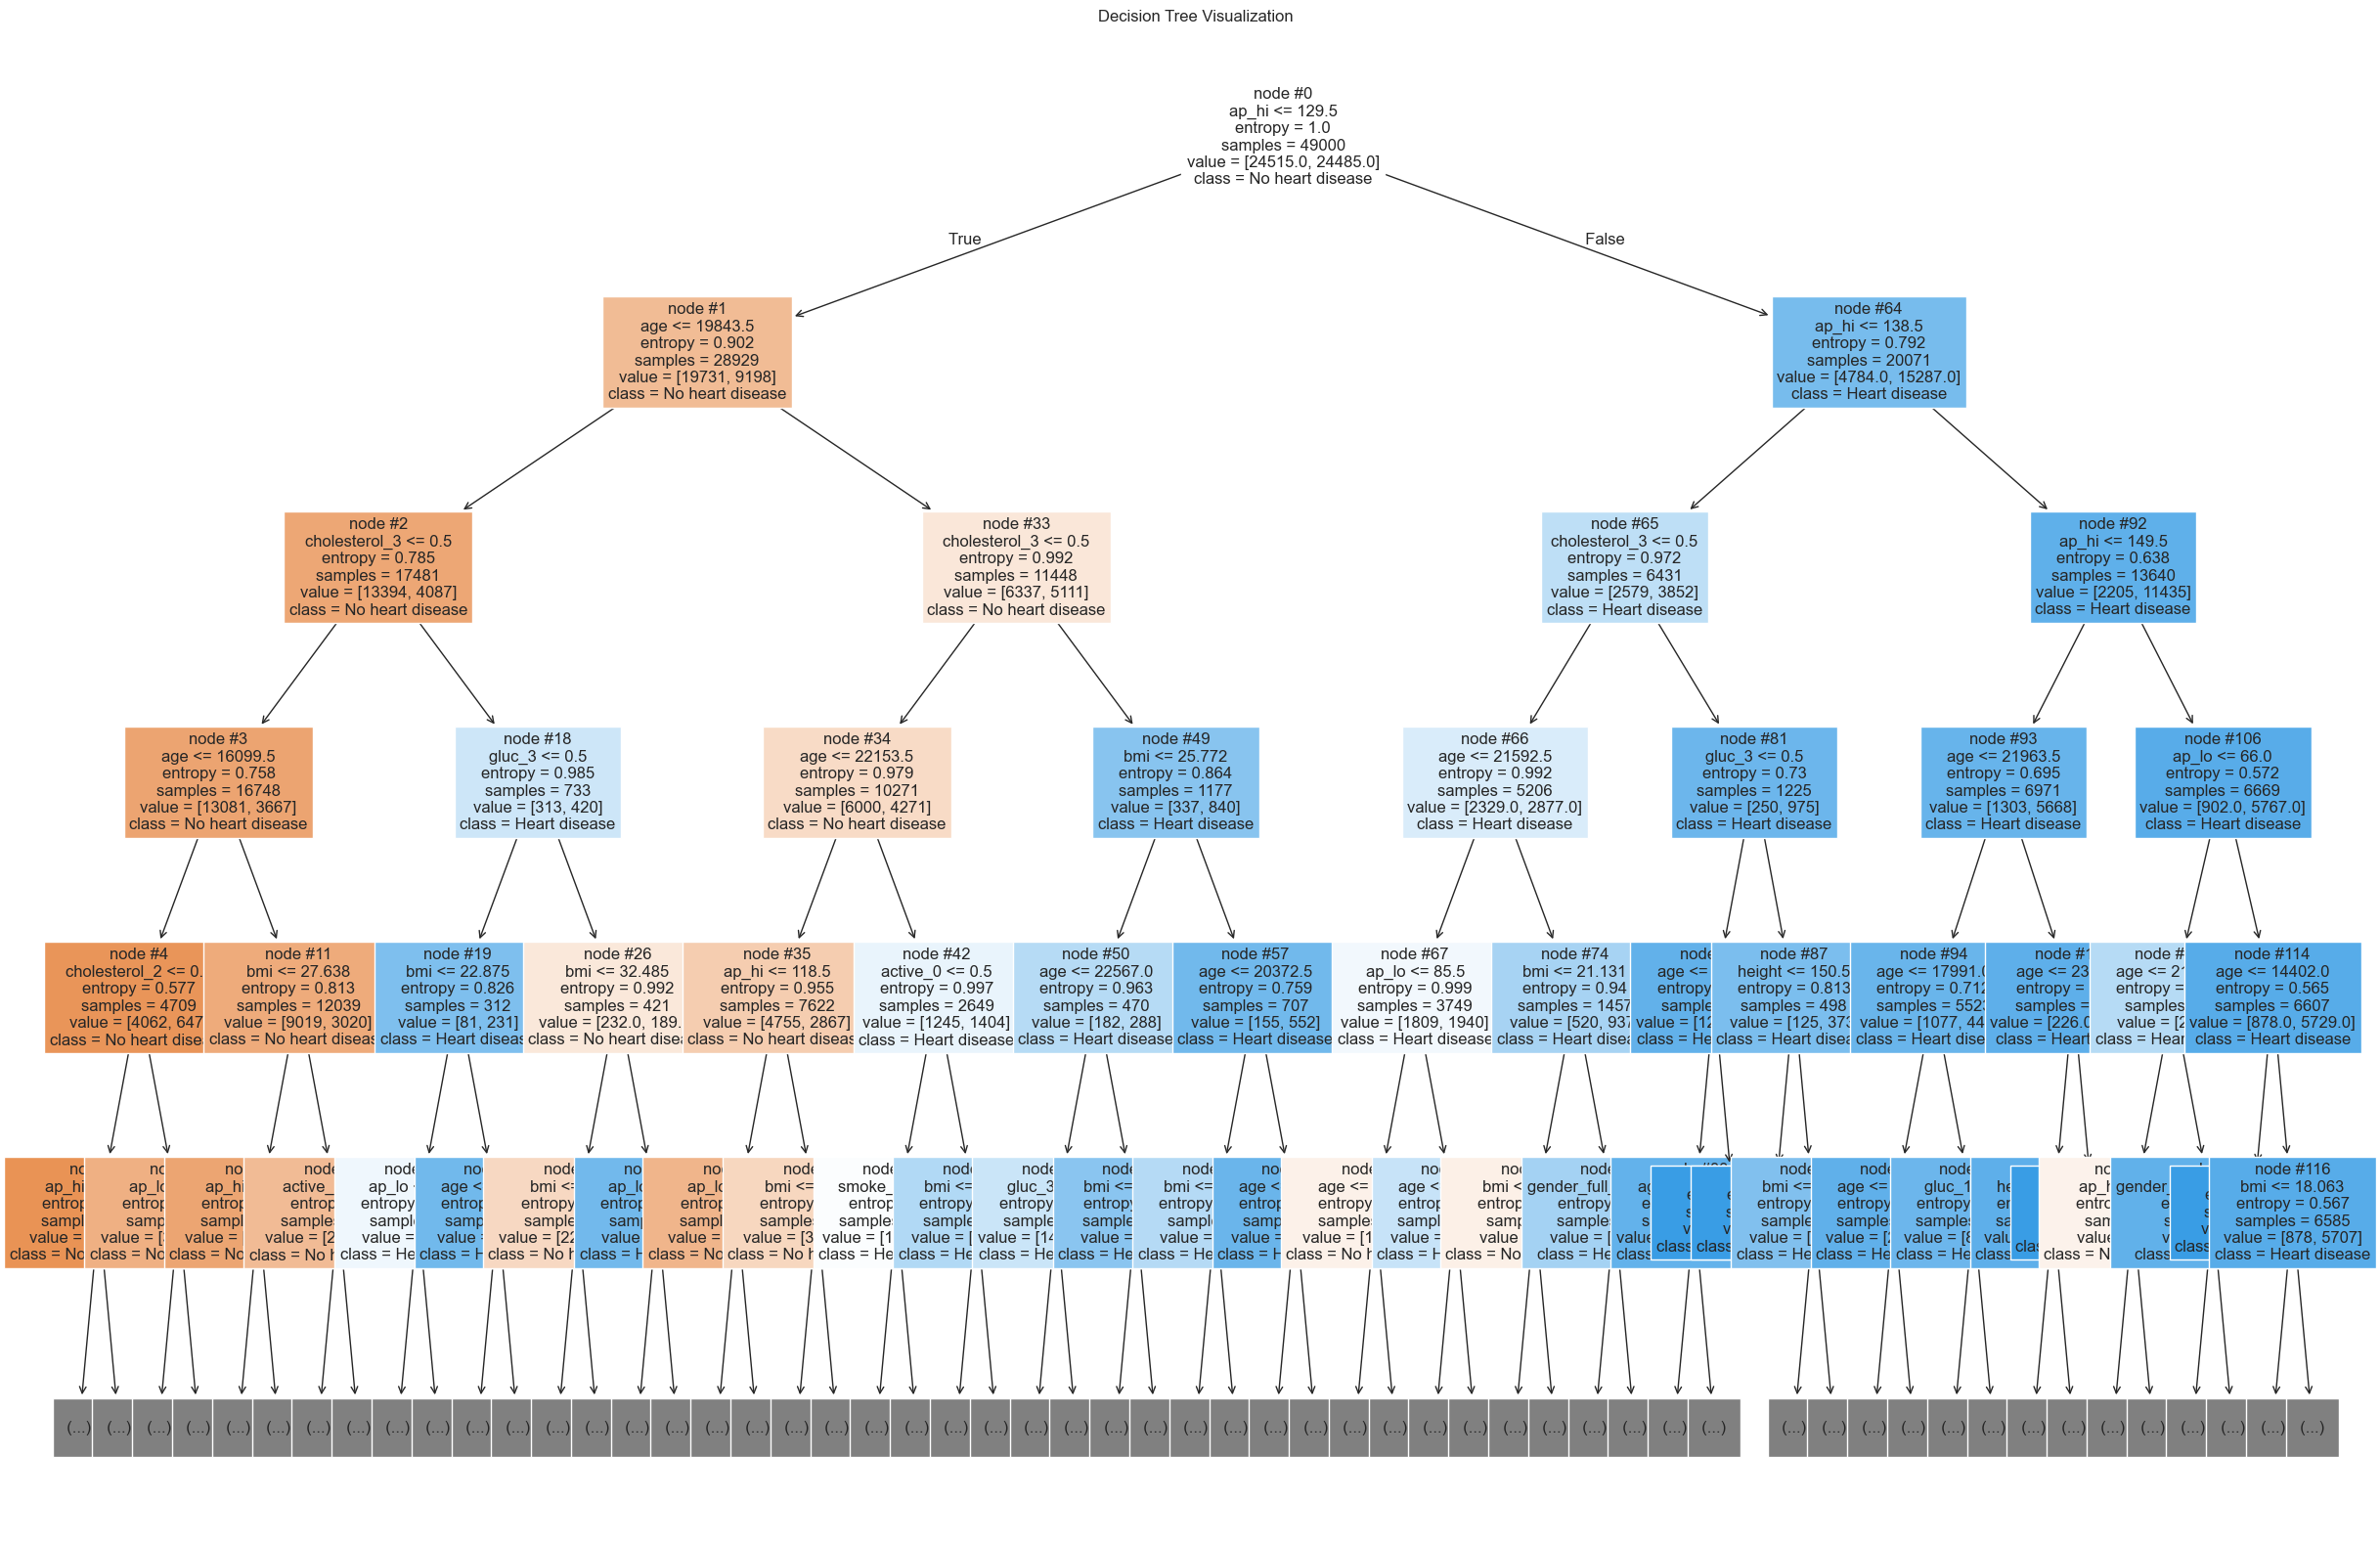

In [34]:
#Plotting of decision tree
from sklearn import tree

# Features list
features = list(x.columns)

# Class names for clarity
class_names = ['No heart disease', 'Heart disease']  

# Plotting the decision tree
plt.figure(figsize=(30, 20))

tree.plot_tree(
    best_model, 
    max_depth=5, 
    feature_names=features, 
    filled=True, 
    fontsize=12, 
    node_ids=True, 
    class_names=class_names 
)

plt.title("Decision Tree Visualization")
plt.show()


In [35]:
# Random forest CLassifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10506
           1       0.72      0.70      0.71     10494

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



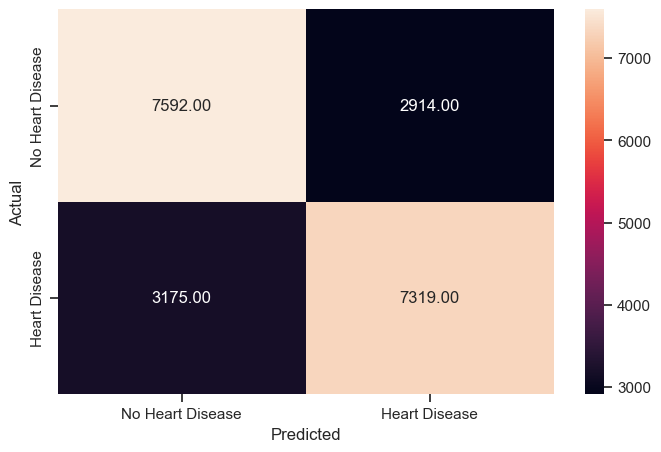

In [36]:
# Checking performance on the test data

y_pred_test_rf = rf.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

Comment:

The random forest gives acceptable accuracy, precision and f1_score of 71%.

The recall score is 70%, whihc is very good.

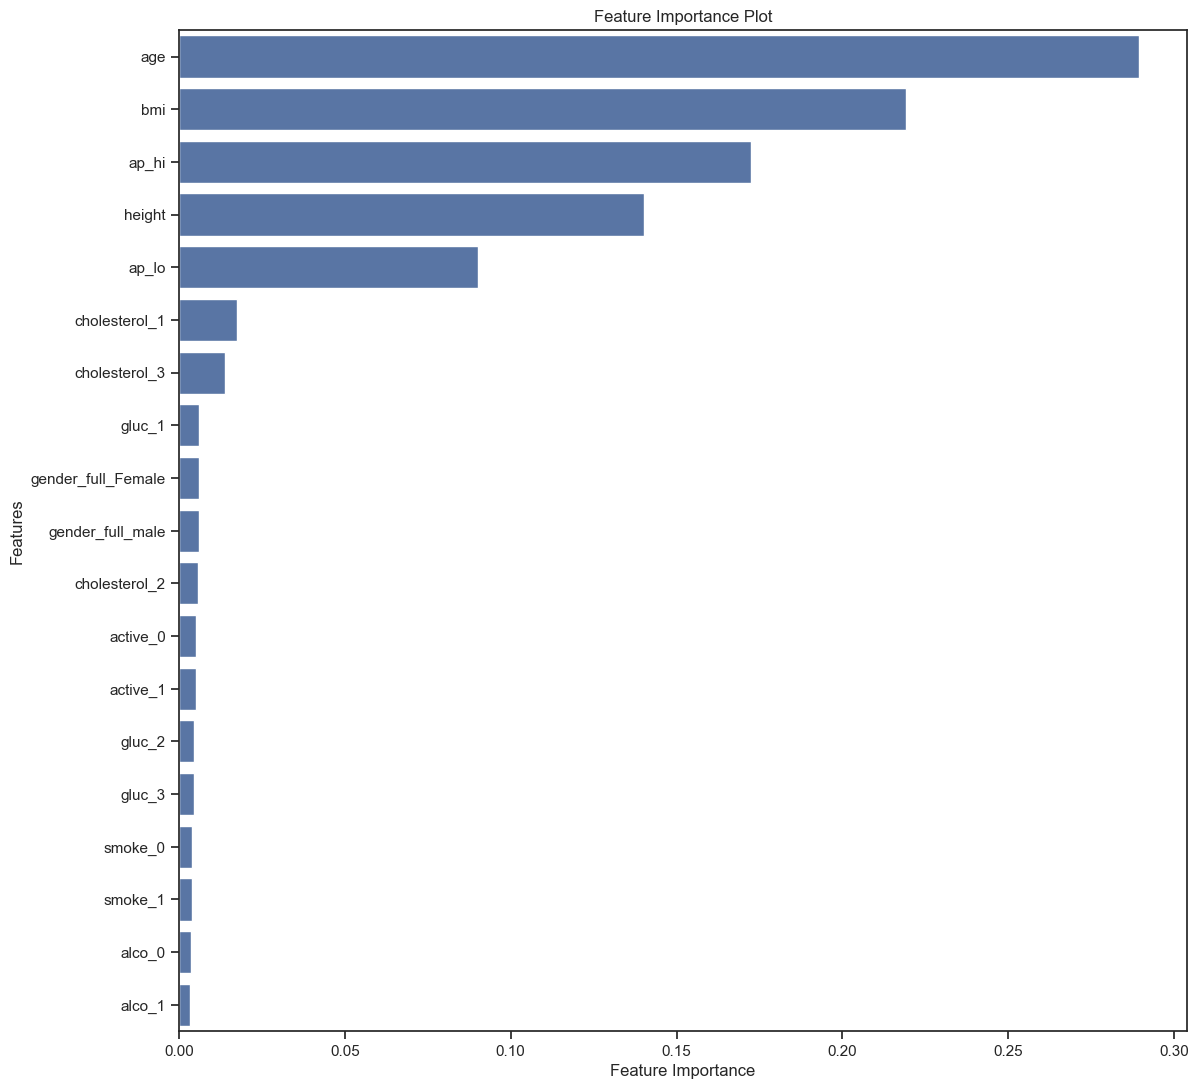

In [37]:
# importance of features in the tree building
importances = rf.feature_importances_

columns = x.columns

# Create a DataFrame for feature importance
importance_df_drop = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


Comment:

alco, smoke, gender, active and cholestrol 1 and 2, have the least impact on heart disease, similar to results oberserved in decision tree model

age, ap_hi/lo, and bmi have greater impact. 

In [38]:
# Hyperparameter fine-tuning for Random Forest on multi-class dataset
parameters = {'n_estimators': [50, 100, 150, 250],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 3, 5]}

rf_clf = GridSearchCV(RandomForestClassifier(),
                      parameters, 
                      cv=5, 
                      #scoring='f1_macro',
                      scoring='roc_auc_ovr',
                      n_jobs=-1,
                     verbose = 2)
_ = rf_clf.fit(x_train, y_train)

print(f"Best estimator: {rf_clf.best_estimator_}")
print(f"Best parameters: {rf_clf.best_params_}")
print(f"Best score: {rf_clf.best_score_:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.80


              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10506
           1       0.76      0.67      0.71     10494

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



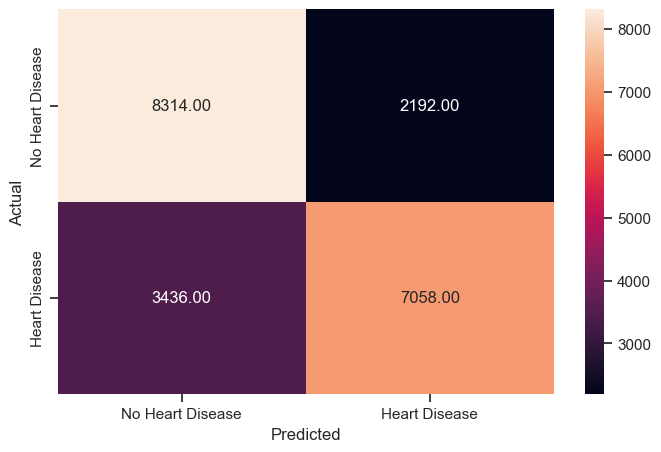

In [39]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_clf.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Comment: 

The accuracy slightly improved from 71 to 73%, however, the recall value was affected, it slightly decreased. 

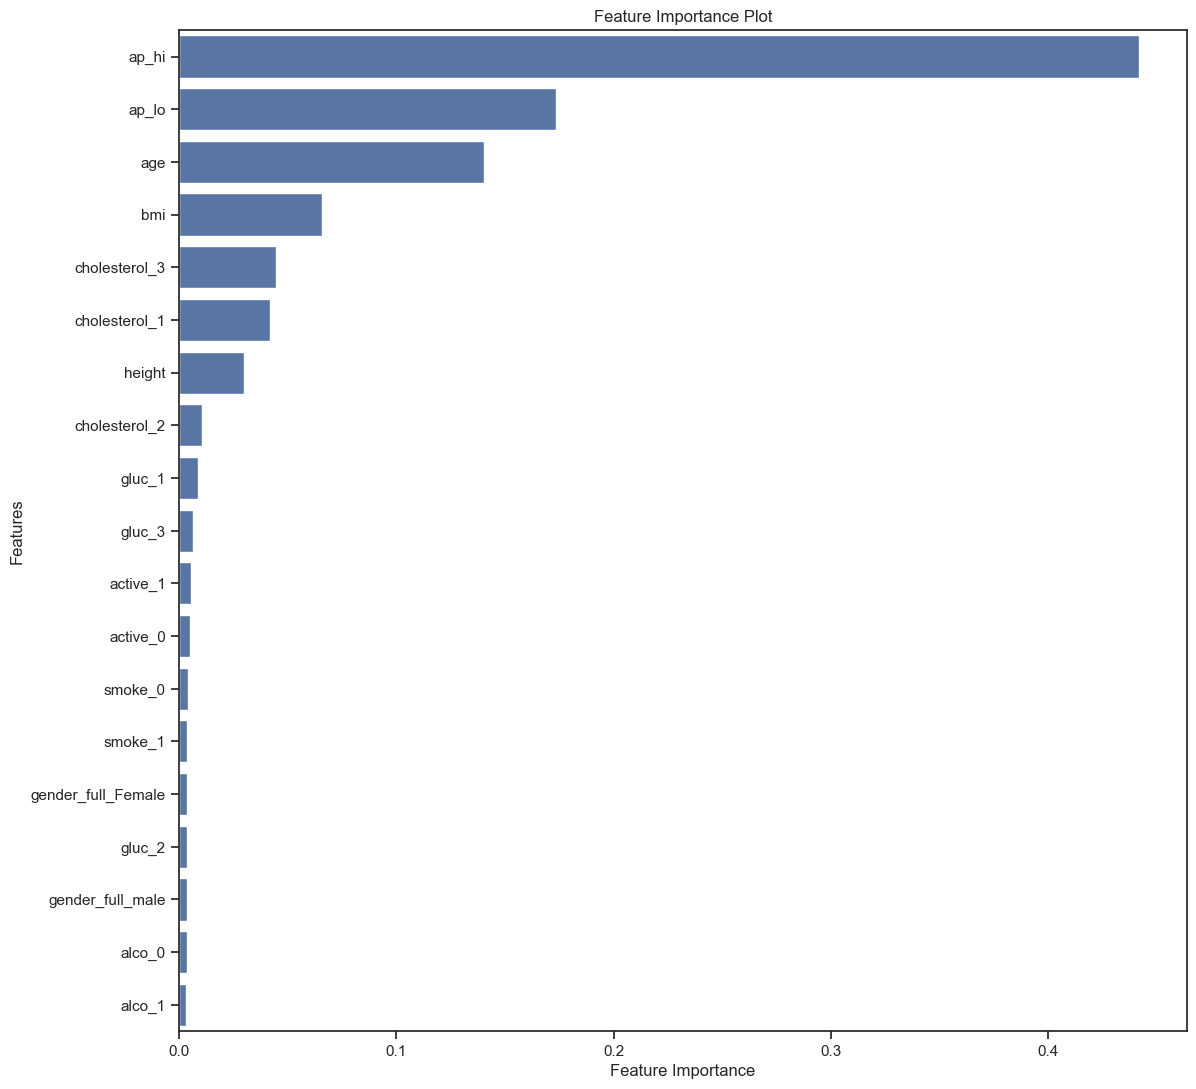

In [40]:
# Feature importance of tuned model

rf_clf = rf_clf.best_estimator_
importances = rf_clf.feature_importances_

columns = x.columns

# Create a DataFrame for feature importance
importance_df_drop = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

comment:

ap_hi/lo, age and bmi are leading influencers of heart disease

In [41]:
# SVM CLassifier
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_sc, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10506
           1       0.74      0.69      0.71     10494

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



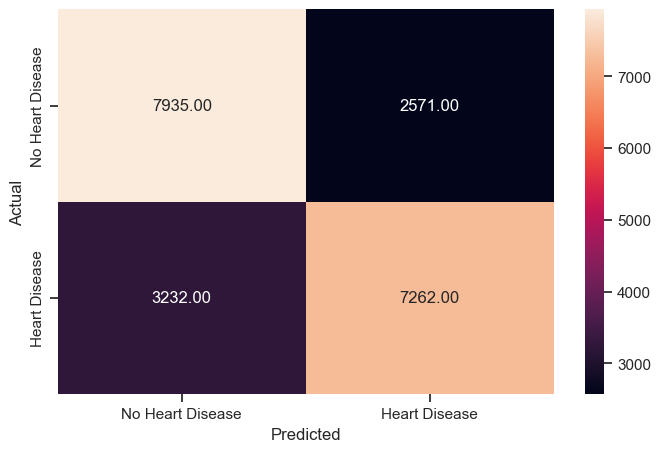

In [42]:
# Checking performace on test dataset
y_pred_test_svm = svm.predict(x_test_sc)

metrics_score(y_test, y_pred_test_svm)

comment:

There is high precision of 74% with accpetable accuracy of 72%

The recall score need to be improved

In [43]:
#scaled data

sc_train = StandardScaler()
sc_test = StandardScaler()

x_train_sc = sc_train.fit_transform(x_train)
x_test_sc = sc_test.fit_transform(x_test)

In [44]:
#Multilayer Perception (MLP) classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500) # Multi Layer Perceptron with 3 hidden layers with 13 neurons each

mlp.fit(x_train_sc,y_train) 

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     10506
           1       0.74      0.72      0.73     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



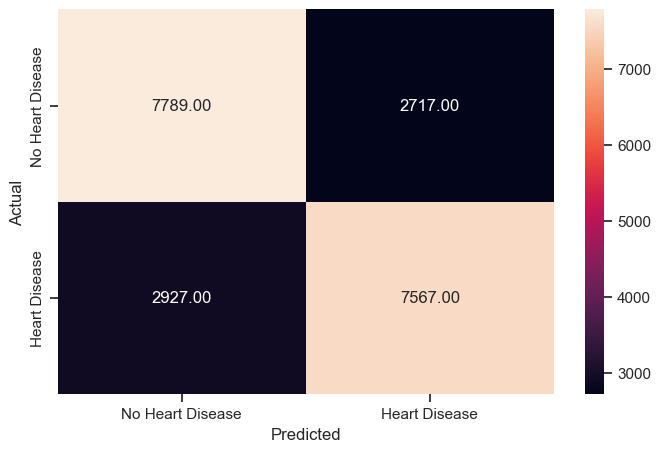

In [45]:
# Checking performace on test dataset
y_pred_test_mlp = mlp.predict(x_test_sc)

metrics_score(y_test, y_pred_test_mlp)

comment:

Accuracy of 73% was obtained on test data with precision and f1 score of 75% and 72%, respectively. 

Shape of x_train_sc: (49000, 19)
Shape of df_drop: (70000, 20)


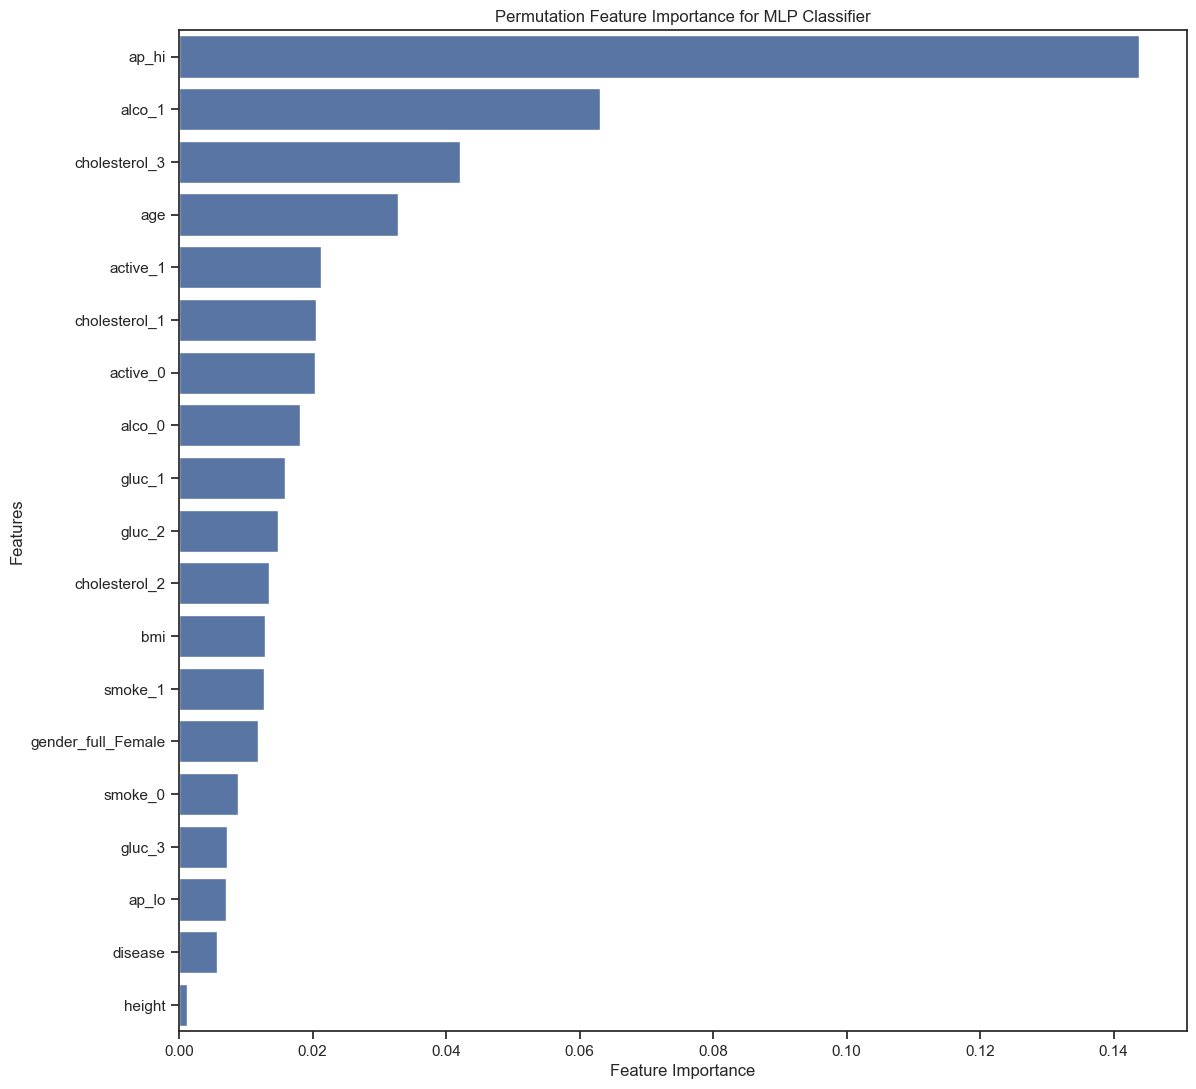

In [46]:
from sklearn.inspection import permutation_importance

print("Shape of x_train_sc:", x_train_sc.shape)
print("Shape of df_drop:", df_drop.shape)

columns = df_drop.columns[:x_train_sc.shape[1]]

x_train_sc_df = pd.DataFrame(x_train_sc, columns=columns)

# Calculate permutation importance
result = permutation_importance(mlp, x_train_sc, y_train, scoring='f1_macro', n_repeats=10, random_state=42)

# Create a DataFrame for feature importance
importances = result.importances_mean
importance_df_drop = pd.DataFrame(importances, index=x_train_sc_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Permutation Feature Importance for MLP Classifier")
plt.show()


In [47]:
# Hyperparameter fine-tuning for mlp

parameters = {
    "hidden_layer_sizes": [(50,), (100,)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001],
    "learning_rate": ["constant", "adaptive"],
}

mlp_clf =  GridSearchCV(estimator=mlp, 
                        param_grid=parameters, cv=3, 
                        scoring="accuracy", 
                        verbose=2, 
                        n_jobs=-1
)
_ = mlp_clf.fit(x_train_sc, y_train)

print(f"Best estimator: {mlp_clf.best_estimator_}")
print(f"Best parameters: {mlp_clf.best_params_}")
print(f"Best score: {mlp_clf.best_score_:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=500)
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score: 0.73


              precision    recall  f1-score   support

           0       0.72      0.75      0.74     10506
           1       0.74      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



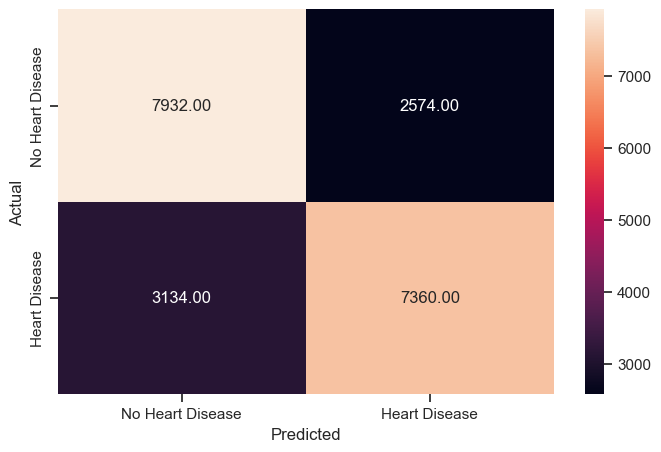

In [48]:
# Checking performance on the test data

y_pred_test_mlp_tuned = mlp_clf.predict(x_test_sc)

metrics_score(y_test, y_pred_test_mlp_tuned)

comment:

The accuracy did not improve after tuning the model, however, an improvement is observed on the recall score for with heart disease(1), it increased from 69% to 73%.

Shape of x_train_sc: (49000, 19)
Shape of df_drop: (70000, 20)


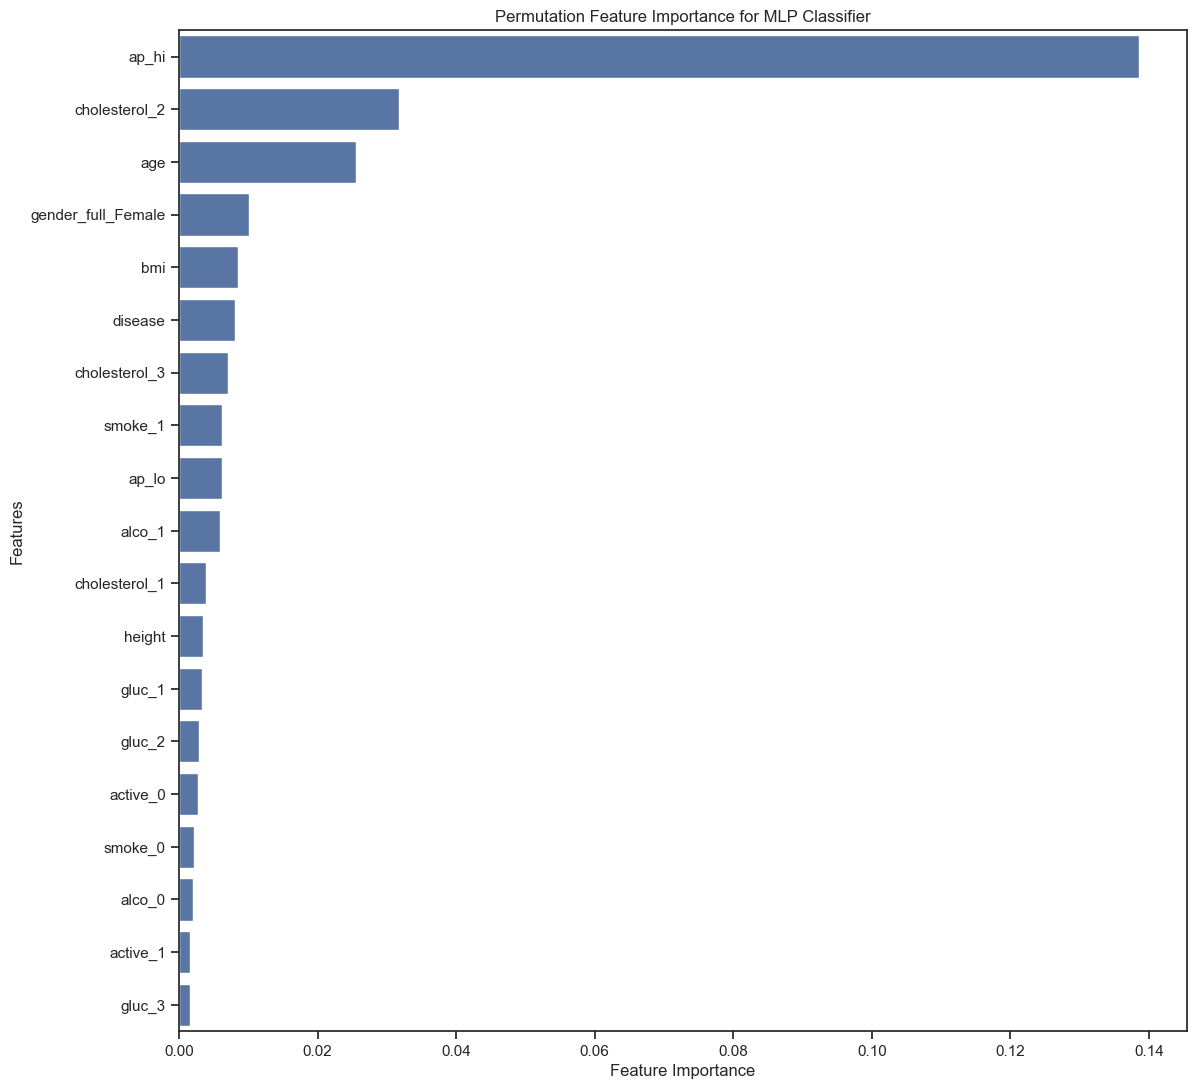

In [49]:
print("Shape of x_train_sc:", x_train_sc.shape)
print("Shape of df_drop:", df_drop.shape)

columns = df_drop.columns[:x_train_sc.shape[1]]

x_train_sc_df = pd.DataFrame(x_train_sc, columns=columns)

# Calculate permutation importance
result = permutation_importance(mlp_clf, x_train_sc, y_train, scoring='f1_macro', n_repeats=10, random_state=42)

# Create a DataFrame for feature importance
importances = result.importances_mean
importance_df_drop = pd.DataFrame(importances, index=x_train_sc_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop['Importance'], y=importance_df_drop.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Permutation Feature Importance for MLP Classifier")
plt.show()


comment:

The feature importance for mlp shows opposite results compared to other models. e.g bmi has shown to be leading influencer in the previous model whilst here is the least. 

In [50]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you already have your models and predictions (replace with actual model and data)
models = {
    'Logistic Regression': lg,
    'SVM': svm,
    'MLP': mlp,
    'MLP Classifier': mlp_clf
}

# Create a list to collect results
results = []

# Loop over each model to compute metrics and gather results
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    predicted = model.predict(x_test_sc)  # assuming you have x_test_sc and y_test for evaluation
    report = classification_report(y_test, predicted, output_dict=True)  # Get detailed metrics as dictionary
    
    # Extract macro average metrics
    metrics = report['macro avg']
    result = {
        'Model': model_name,
        'Accuracy': metrics['f1-score'],  # Use 'f1-score' for general performance, you can change it
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1 Score': metrics['f1-score'],
    }
    
    results.append(result)

# Convert the list of results into a DataFrame
metrics_df = pd.DataFrame(results)

# Display the results table
print(metrics_df)


Evaluating model: Logistic Regression
Evaluating model: SVM
Evaluating model: MLP
Evaluating model: MLP Classifier
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.723958   0.727146  0.724685  0.723958
1                  SVM  0.723383   0.724555  0.723649  0.723383
2                  MLP  0.731208   0.731330  0.731232  0.731208
3       MLP Classifier  0.727989   0.728840  0.728175  0.727989


In [51]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you already have your models and predictions (replace with actual model and data)
models = {
    'Decision Tree': dt,
    'Decision Tree Classifier': dt_clf,
    'Random Forest': rf,
    'Random Forest Classifier': rf_clf,
}

# Create a list to collect results
results = []

# Loop over each model to compute metrics and gather results
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    predicted = model.predict(x_test)  # assuming you have x_test_sc and y_test for evaluation
    report = classification_report(y_test, predicted, output_dict=True)  # Get detailed metrics as dictionary
    
    # Extract macro average metrics
    metrics = report['macro avg']
    result = {
        'Model': model_name,
        'Accuracy': metrics['f1-score'],  # Use 'f1-score' for general performance, you can change it
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1 Score': metrics['f1-score'],
    }
    
    results.append(result)

# Convert the list of results into a DataFrame
metrics_df = pd.DataFrame(results)

# Display the results table
print(metrics_df)


Evaluating model: Decision Tree
Evaluating model: Decision Tree Classifier
Evaluating model: Random Forest
Evaluating model: Random Forest Classifier
                      Model  Accuracy  Precision    Recall  F1 Score
0             Decision Tree  0.629571   0.629571  0.629571  0.629571
1  Decision Tree Classifier  0.727505   0.729829  0.728022  0.727505
2             Random Forest  0.709999   0.710176  0.710040  0.709999
3  Random Forest Classifier  0.731038   0.735301  0.731966  0.731038


comment:

Comparing all the model, Hyperparameter tuned Random Forest model seems to be perfoming a bit better compared all the other models. Followed by mlp either tuned or not. 


In [52]:
df_drop.columns

Index(['age', 'ap_hi', 'ap_lo', 'height', 'disease', 'bmi', 'active_0',
       'active_1', 'alco_0', 'alco_1', 'cholesterol_1', 'cholesterol_2',
       'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1',
       'gender_full_Female', 'gender_full_male'],
      dtype='object')

In [53]:
#Improve perfomance of selected model/s 

df_drop2 = df_drop.drop(columns = ['active_0','active_1',  'alco_0', 'alco_1', 'gluc_1', 'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1',
       'gender_full_Female', 'gender_full_male'])

df_drop2.head()

,age,ap_hi,ap_lo,height,disease,bmi,cholesterol_1,cholesterol_2,cholesterol_3
0,18393,110,80,168,0,21.967120,True,False,False
1,20228,140,90,156,1,34.927679,False,False,True
2,18857,130,70,165,1,23.507805,False,False,True
3,17623,150,100,169,1,28.710479,True,False,False
4,17474,100,60,156,0,23.011177,True,False,False


In [54]:
# Split data

x=df_drop2.drop('disease',axis=1)
y=df_drop2['disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, 
                                                    random_state = 42, stratify = y)

#scaled data

sc_train = StandardScaler()
sc_test = StandardScaler()

x_train_sc = sc_train.fit_transform(x_train)
x_test_sc = sc_test.fit_transform(x_test)

In [55]:
# Hyperparameter fine-tuning for Random Forest on multi-class dataset
parameters = {'n_estimators': [50, 100, 150, 250],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 3, 5]}

rf2_clf = GridSearchCV(RandomForestClassifier(),
                      parameters, 
                      cv=5, 
                      #scoring='f1_macro',
                      scoring='roc_auc_ovr',
                      n_jobs=-1,
                     verbose = 2)
_ = rf2_clf.fit(x_train, y_train)

print(f"Best estimator: {rf2_clf.best_estimator_}")
print(f"Best parameters: {rf2_clf.best_params_}")
print(f"Best score: {rf2_clf.best_score_:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=250)
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 250}
Best score: 0.80


              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10506
           1       0.76      0.68      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



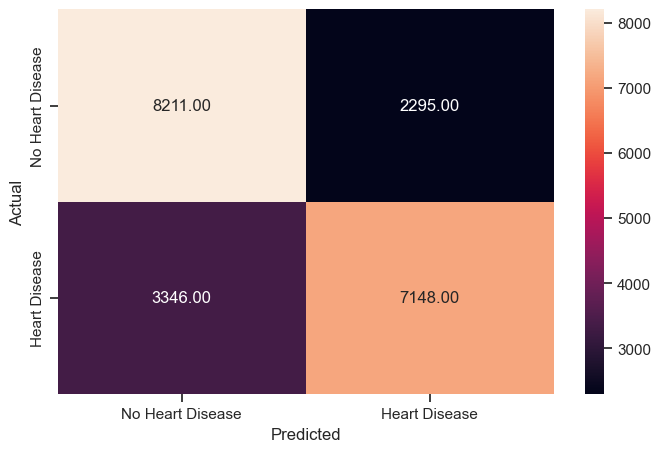

In [56]:
# Checking performace on test dataset
y_pred_test_rf2_tuned = rf2_clf.predict(x_test)

metrics_score(y_test, y_pred_test_rf2_tuned)

comment:

The accuracy remained at 73% after removing least features. The precision improved by 3%. However, the recall scaore for positive heart disease decreased from 73% to 68%

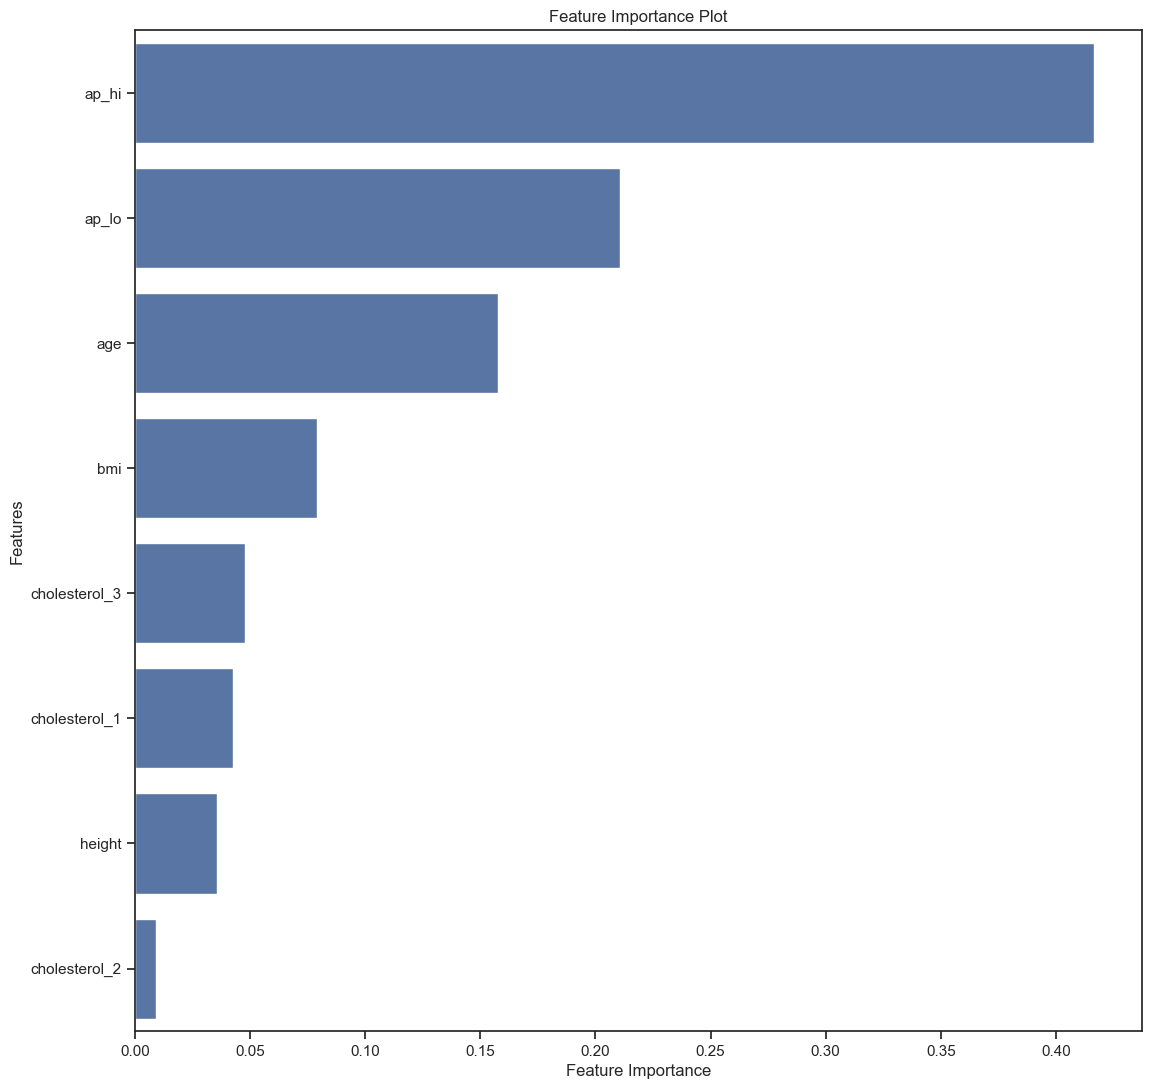

In [57]:
# Feature importance of tuned model

rf2_clf = rf2_clf.best_estimator_
importances = rf2_clf.feature_importances_

columns = x.columns

# Create a DataFrame for feature importance
importance_df_drop2 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df_drop2['Importance'], y=importance_df_drop2.index)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

Comment:

The order of feature importance did not change. 

In [58]:
# mlp model

mlp2 = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500) 

mlp2.fit(x_train_sc,y_train) 

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [59]:
# Hyperparameter fine-tuning for mlp

parameters = {
    "hidden_layer_sizes": [(50,), (100,)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001],
    "learning_rate": ["constant", "adaptive"],
}

mlp2_clf =  GridSearchCV(estimator=mlp2, 
                        param_grid=parameters, cv=3, 
                        scoring="accuracy", 
                        verbose=2, 
                        n_jobs=-1
)
_ = mlp2_clf.fit(x_train_sc, y_train)

print(f"Best estimator: {mlp2_clf.best_estimator_}")
print(f"Best parameters: {mlp2_clf.best_params_}")
print(f"Best score: {mlp2_clf.best_score_:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best estimator: MLPClassifier(alpha=0.001, learning_rate='adaptive', max_iter=500)
Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score: 0.73


without tuning
              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10506
           1       0.74      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



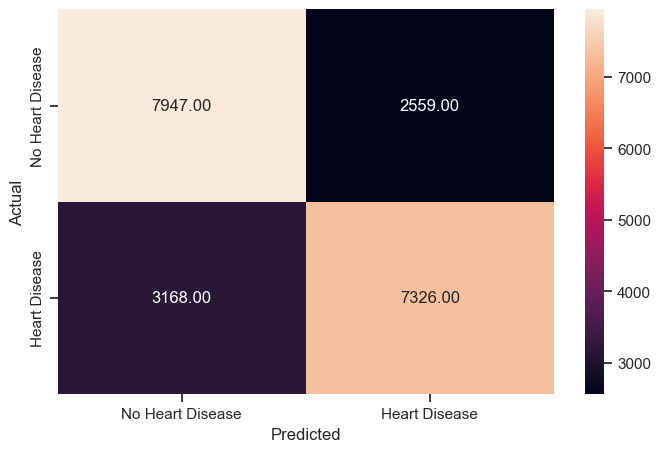

with tuning
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10506
           1       0.74      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



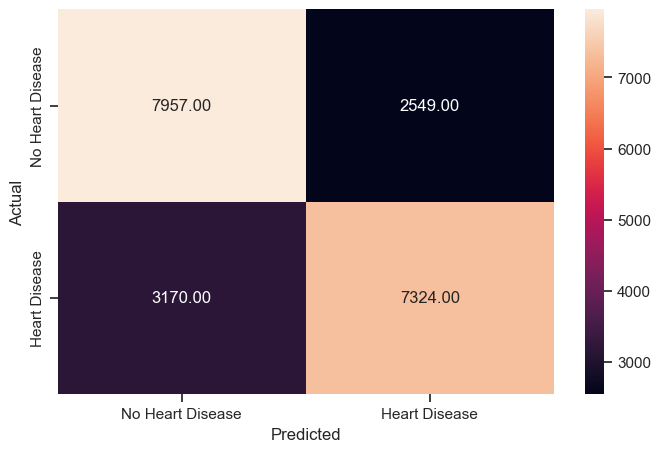

In [60]:
# Checking performance on the test data
print("without tuning")
y_pred_test_mlp2 = mlp2.predict(x_test_sc)

metrics_score(y_test, y_pred_test_mlp2)

print("with tuning")

y_pred_test_mlp2_tuned = mlp2_clf.predict(x_test_sc)

metrics_score(y_test, y_pred_test_mlp2_tuned)

comment: 

There is no difference in terms of scores between the tuned and the untuned. Even after removing certain columns, the results have not changed 

# Recommendations

- **Choose Random Forest Classifier for Deployment**, consistent high metrics make it the best model. Hyperparameters can be further fine-tuned to improve performance.
  
- **Fine-Tune MLP Classifier**, it performed competitively. Adjustment of hyperparameters could optimize its performance further.
  
- **Validate with External Data**, to ensure that the selected model's performance generalizes well by validating it on an external or unseen dataset. 
